# Tutorial: Choosing priors under constraints

_**NB: you need PyMC >= 4.0 to run this notebook**_

Problems as a modeler:

- You know you want a Gamma prior (positive values) or a Beta ($[0, 1]$ values), but these distributions are way less intuitive to parametrize than the Normal

- People don't understand your job, so you end up alone at the party

![alone](https://media.giphy.com/media/W0c3xcZ3F1d0EYYb0f/giphy.gif)

Actually, we won't cover that second problem here -- the video would be way too long

- You need a non-stats person to define your prior. They neither know nor care about Gamma or Beta, but they give you important information:

> I bet that we need to spend **between 0.1 and 3 dollars** on Google ads to get one additional sale -- I'm almost sure it's not less, but maybe it's more.

As a statistician, you can translate that into:

> **I need a Gamma that has 95% probability mass between 0.1 and 3**

**By hand, it may take you a loooooong time** to find an appropriate combination of parameters that give you a decent Gamma -- the drawback of the flexibility.

Now we have two options:

1. Despair and cry

![cry](https://media.giphy.com/media/d2lcHJTG5Tscg/giphy.gif)

2. Not despair and use the new `pymc.find_constrained_prior` function

![BringIt](https://media.giphy.com/media/sG4zmff2zDOp7t2MNA/giphy.gif)

We'll demonstrate how to do option 1 in another video. For now, let's choose option 2!

Under the hood, PyMC is going to ask scipy's optimizer:

> **What are the $\alpha$ and $\beta$ parameters that fit the user's constraint?**

In [1]:
import arviz as az
import numpy as np
import pymc as pm

In [2]:
MASS = 0.95
LOWER = 0.1
UPPER = 3
constrained_priors = pm.find_constrained_prior(
    pm.Gamma, lower=LOWER, upper=UPPER, mass=MASS, init_guess=dict(alpha=1, beta=1)
)

WARNING (aesara.tensor.basic_opt): Optimization Warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.


We're getting back the optimized distribution's parameters:

In [3]:
constrained_priors

{'alpha': 2.2002514675808746, 'beta': 1.7605241820687383}

**How do we use this in our PyMC model?** 

Easy!

In [6]:
with pm.Model() as my_super_model:
    my_beautiful_var = pm.Gamma("my_beautiful_var", **constrained_priors)

Now you may ask: what does this distribution look like? Go ahead, ask it! 

My answer: let's draw samples from it and plot them!

In [11]:
draws = pm.draw(my_beautiful_var, draws=10_000)

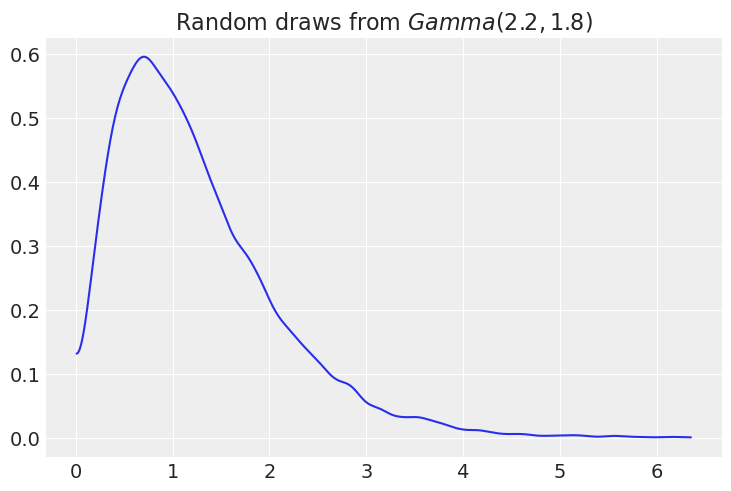

In [12]:
az.style.use("arviz-darkgrid")
ax = az.plot_dist(draws)
ax.set_title(
    f"Random draws from $Gamma({round(constrained_priors['alpha'], 1)}, {round(constrained_priors['beta'], 1)})$"
);

And boom! Indeed, our constraint seems to be respected. To be completely honest, I'm _sure_ it is -- the maths are telling us: PyMC runs some tests in the background, so if any issue appears, it would have warned us that our constraint is not respected.

And on that note, PyMCheers, and best Bayesian wishes, wherever you are 🖖

![MicDrop](https://media.giphy.com/media/3o7qDSOvfaCO9b3MlO/giphy.gif)